## General Social Survey, 2012 Merged Data
The Gengeral Social Survey collects information from the public on a wide variety of topics including social issues, the ecomomy, education, and government.

Data: [General Social Survey, 2012 Merged Data](https://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/35478?sortBy=&searchSource=revise&q=general+social+survey)

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [87]:
sns.set_palette("husl")

In [88]:
survey = pd.read_csv('35478-0001-Data.tsv', sep='\t')
survey.head()

,YEAR,ID,INTID,FEEUSED,FEELEVEL,DATEINTV,LNGTHINV,INTAGE,INTETHN,MODE,...,SAMPCODE,SAMPLE,OVERSAMP,WTSS,WTSSNR,WTSSALL,WTCOMB,WTCOMBNR,VSTRAT,VPSU
0,2012,1,49,1,75,721,69,60,1,1,...,601,10,1,2.621963,2.869532,2.621963,6.402159,7.006659,-1,-1
1,2012,2,150,1,75,624,53,32,1,1,...,601,10,1,3.495950,3.826043,3.495950,6.514477,7.129583,-1,-1
2,2012,3,150,1,75,627,77,32,1,1,...,601,10,1,1.747975,1.913021,1.747975,1.671130,1.828920,-1,-1
3,2012,4,49,1,20,527,78,60,1,1,...,601,10,1,1.235694,1.352370,1.235694,1.181370,1.292917,-1,-1
4,2012,5,235,1,75,620,149,62,1,1,...,601,10,1,0.873988,0.956511,0.873988,0.835565,0.914460,-1,-1


In [89]:
#dimensions of the data
survey.shape

(4820, 1069)

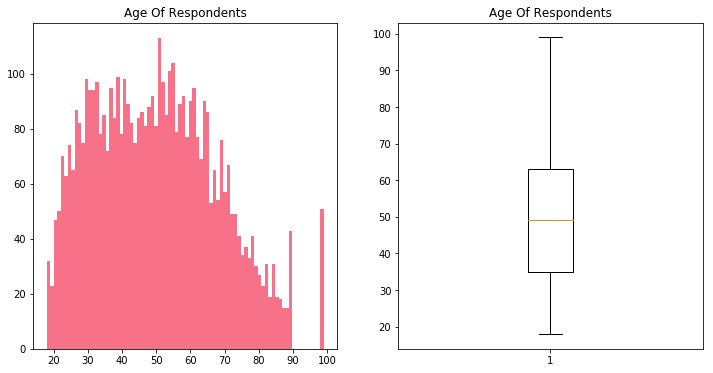

In [90]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.hist(survey['AGE'], bins=80)
plt.title('Age Of Respondents')

plt.subplot(1, 2, 2)
plt.boxplot(survey['AGE'])
plt.title('Age Of Respondents')

plt.show()

At first glance, the histogram shows that the most common age of the respondent is in the 50's. The overall overall distribution appears to be slightly skewed to the right. One thing that seems strange is the high number of respondents who are just below age 100. After looking at the metadata, it states that the 99 represents missing data. All respondents 89 and up are grouped into 89.

The boxplot of the Age variable reinforces what was observed in the histogram. The median appears to be about 50. The interquartile range spans from around 35 to 65.

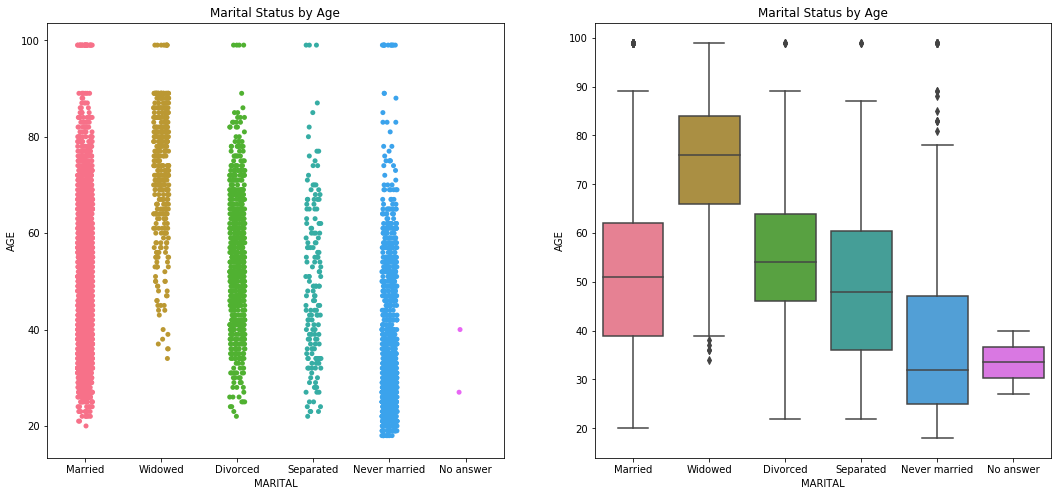

In [98]:
plt.figure(figsize=(18,8))


plt.subplot(1, 2, 1)
sns.stripplot(x="MARITAL", y="AGE", data=survey, jitter=True)
plt.title('Marital Status by Age')
plt.xticks(np.arange(6), ('Married', 'Widowed', 'Divorced', 'Separated', 'Never married', 'No answer'))

plt.subplot(1, 2, 2)
sns.boxplot(x="MARITAL", y="AGE", data=survey)
plt.title('Marital Status by Age')
plt.xticks(np.arange(6), ('Married', 'Widowed', 'Divorced', 'Separated', 'Never married', 'No answer'))

plt.show()

The plots above show the relationship between marital status and age. The data is more or less what could be expected, most of the widdowed respondents tend to be older, and the number of people who have never been married decreases as the age increases.


In [92]:
degree_table = pd.crosstab(index=survey['DEGREE'], 
                          columns=survey['PADEG'])

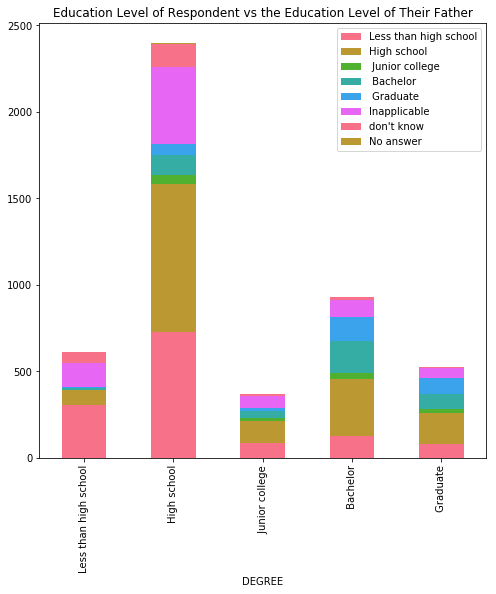

In [97]:
degree_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

plt.xticks(np.arange(5),('Less than high school','High school', ' Junior college', ' Bachelor', ' Graduate'))
plt.legend(labels=['Less than high school','High school', ' Junior college', ' Bachelor', ' Graduate', 'Inapplicable', "don't know", 'No answer'])
plt.title('Education Level of Respondent vs the Education Level of Their Father')

plt.show()

There appears to be a correlation between education level of respondent and that of their father. The respondents who have bachelors or graduate degrees show a higher percentage of their fathers having bachelor or graduate degrees. 

Source: Smith, Tom W., Marsden, Peter V., and Hout, Michael. General Social Survey, 2012 Merged Data, Including a Cultural Module [United States]. Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2016-05-26. https://doi.org/10.3886/ICPSR35478.v4

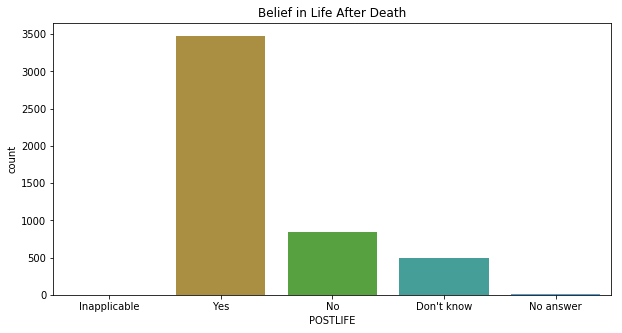

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(x="POSTLIFE", data=survey);
plt.xticks(np.arange(5),('Inapplicable','Yes', 'No', "Don't know", 'No answer'))
plt.title('Belief in Life After Death')
plt.show()

This plot shows that the overwhelming majority of respondents believe in the afterlife.